# 1. Library

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as snsa
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model

# 2. Data

In [20]:
train_df = pd.read_csv("/content/drive/MyDrive/제목없는 폴더/data/Train.csv", encoding="utf-8",parse_dates=['date'], index_col=0)
test_df = pd.read_csv("/content/drive/MyDrive/제목없는 폴더/data/Test.csv", encoding="utf-8",parse_dates=['date'], index_col=0)

4년 동안 (2013년부터 2017년까지) 델리에서 수집된 날씨 데이터  
날짜(YYYY-MM-DD), 평균기온(℃), 습도(%), 풍속(kmph), 평균기압(atm) (5차원 데이터)  

Train data : 2013년 1월 1일 ~ 2017년 1월 1일  
Test data : 2017년 1월 1일 ~ 2017년 4월 24일

출처: https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

In [11]:
print("_________________________train___________________________________")
train_df.info()
print("\n___________________________test___________________________________")
test_df.info()

_________________________train___________________________________
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-01-01 to 2016-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1461 non-null   float64
 1   humidity      1461 non-null   float64
 2   wind_speed    1461 non-null   float64
 3   meanpressure  1461 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB

___________________________test___________________________________
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB


- 결측치 확인

In [12]:
def Check_MissingValue(dataset,name):
    for i in range(len(dataset.index)-1):
        if pd.Timedelta('1 days') != (dataset.index[i+1]-dataset.index[i]):
            print("index %d, value%d"%(i,x[i]))
    print("{} is clear".format(name))

In [13]:
Check_MissingValue(train_df,"train_df")
Check_MissingValue(test_df,"test_df")

train_df is clear
test_df is clear


- 데이터 확인

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5ecd641d0>,
      dtype=object)

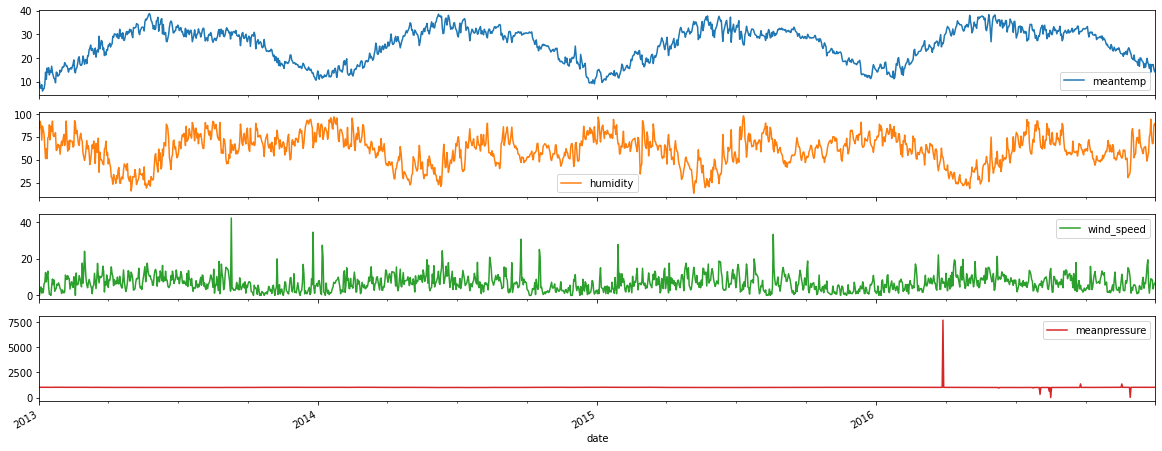

In [14]:
plt.rcParams["figure.figsize"] = (20,8)
train_df.plot(subplots=True)

# 3. Preprocessing

In [34]:
St_sc=StandardScaler()
train_st=St_sc.fit_transform(train_df)

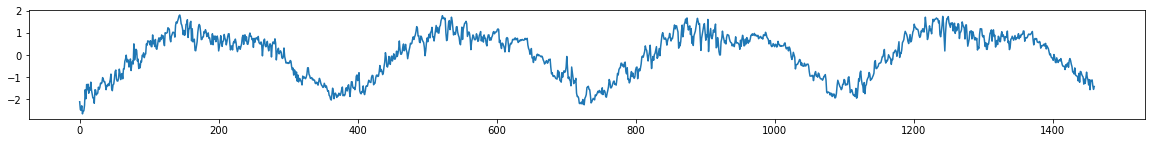

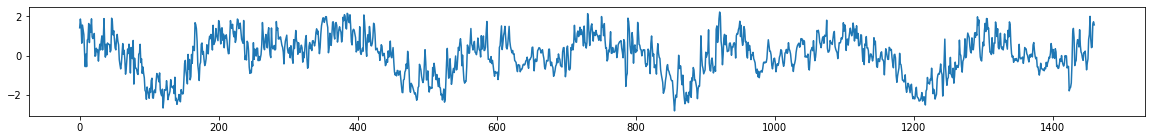

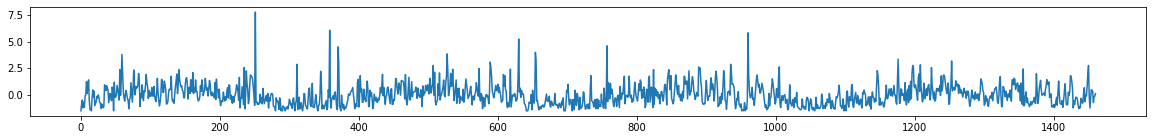

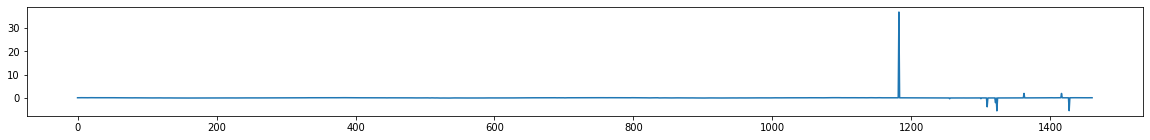

In [38]:
for i in range(train_st.shape[1]):
    plt.rcParams["figure.figsize"] = (20,2)
    plt.plot(train_st[:,i])
    plt.show()

In [31]:
mm_sc=MinMaxScaler()
train_mm=mm_sc.fit_transform(train_st)

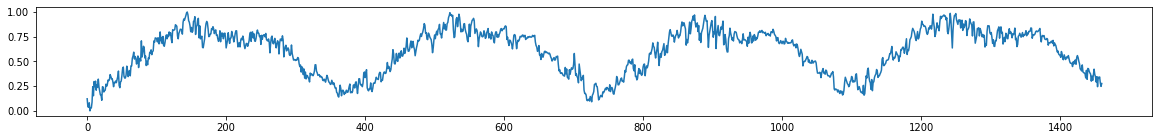

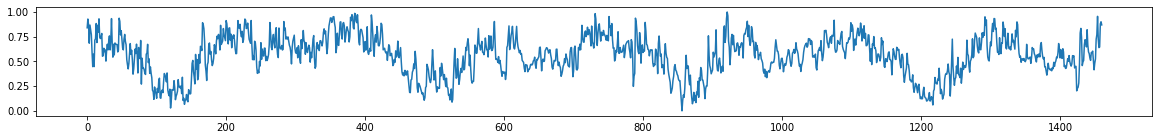

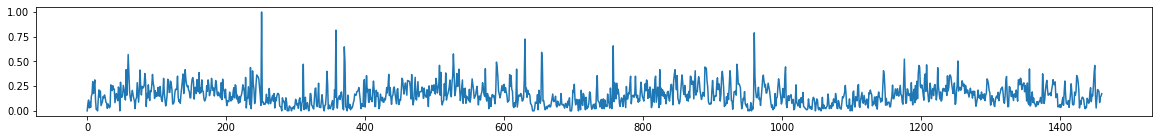

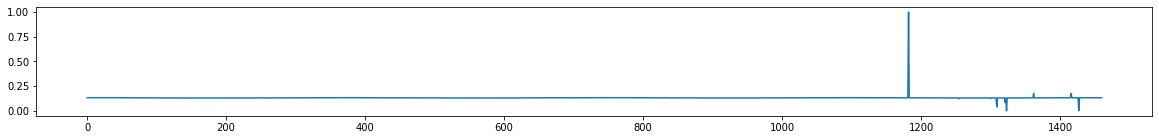

In [40]:
for i in range(train_mm.shape[1]):
    plt.rcParams["figure.figsize"] = (20,2)
    plt.plot(train_mm[:,i])
    plt.show()

In [93]:
#다변량 sequence 분리
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # n_step씩 분리
        end_ix = i + n_steps
        # dataset 끝까지
        if end_ix > len(sequences)-1:
            break
        # input, ouput
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [47]:
train=train_mm[:-1,:] # 마지막날은 제외
n_steps=3 # 3일씩 
Sx,Sy=split_sequences(train,n_steps)
n_features=Sx.shape[2]

# 4. Model 

In [92]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))

In [65]:
es= EarlyStopping(monitor='loss',mode='min',verbose=1,patience=5)

In [66]:
model.compile(optimizer='adam', loss='mse')

In [ ]:

plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [67]:
model.fit(Sx, Sy, epochs=3000, verbose=1,callbacks=[es])

Epoch 1/3000
46/46 [==============================] - 0s 3ms/step - loss: 0.1605
Epoch 2/3000
46/46 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 3/3000
46/46 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 4/3000
46/46 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 5/3000
46/46 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 6/3000
46/46 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 7/3000
46/46 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 8/3000
46/46 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 9/3000
46/46 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 10/3000
46/46 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 11/3000
46/46 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 12/3000
46/46 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 13/3000
46/46 [====

# 5. Test

In [68]:
test=mm_sc.transform(St_sc.transform(test_df))

In [72]:
stacked_raw=train[-n_steps:,:]
new_raws=np.array([[0]*n_features])
for i in range(test.shape[0]):
    new_raw=model.predict(stacked_raw[i:i+10,:][np.newaxis,:,:])
    new_raws=np.vstack([new_raws,new_raw])
    stacked_raw=np.vstack([stacked_raw,test[i,:][np.newaxis,:]])

In [79]:
Predict_result=St_sc.inverse_transform(mm_sc.inverse_transform(new_raws))[1:,0]

In [80]:
Test_values=test_df.values[:,0]

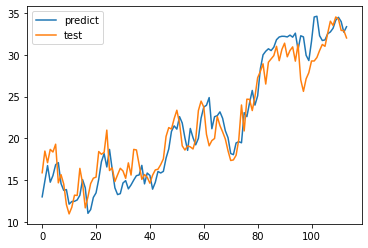

In [81]:
plt.plot(Predict_result,label='predict')
plt.plot(Test_values,label='test')
plt.legend()

In [82]:
mean_squared_error(Predict_result,Test_values)

4.958494843952647

In [78]:
def accuracy(Predict,Test,offset):
  return (Predict[abs(Predict-Test) < offset].size /Test.size)*100

In [84]:
accuracy(Predict_result,Test_values,2.5)

74.56140350877193